# MATH 310-10: Homework 5
- Submitted 11/1/17 by Colton Grainger for MATH 310-10: Ordinary Differential Equations, Engineering Outreach
- **Text:** *Differential Equations and Boundary Value Problems: Computing and Modeling* by C. Henry Edwards, David E. Penney and David Calvis, 5th Edition, Prentice Hall

Here's the work I did in lieu of the assigned homework 5. Compare this write up to sections 3.5 (method of undetermined coefficients and variation of parameters) and 3.6 (mechanical oscillations). I did not include work from section 3.7 (LRC circuits).

## Table of Contents
- To define a differential operator
    - When to use variation of parameters
- Method of undetermined coefficients
    - To find a particular solution
    - To find a general solution
    - To fit a solution to initial conditions
    - To find undetermined coefficients numerically
- Beat Oscillations
    - Various initial conditions
    - Harmonics


## To define a differential operator.

Let's define the familiar differential operator arising in oscillatory motion:
$$L[y] = \frac{d^2}{d^2x}y + y.$$

In [10]:
def L(y):
    return diff(y, x, 2) + y

We've been considering nonhomogenous second order linear differential equations. Often, we are concerned with finding a particular solution $y_p$ such that $L(y_p) = R(x)$, where $R(x)$ is the forcing term. In three examples, I'll consider the action of the familar oscillitory motion operator on different candidates $y_q$, which could be solutions for some DE $L(y) = R(x)$.

In [11]:
# R(x) = cos^2(x)
a, b = var('a b')
# guess
yq =  a*cos(x)^2 + b
print "Here's the function yq."
show(yq)
print "Here's yq operated upon by L."
show(L(yq))

Here's the function yq.


a*cos(x)^2 + b

Here's yq operated upon by L.


-a*cos(x)^2 + 2*a*sin(x)^2 + b

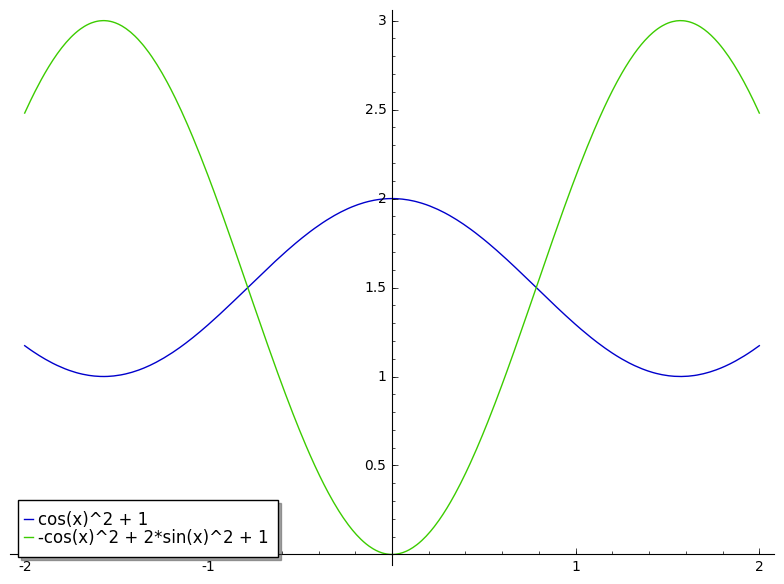

In [12]:
plot([yq(a=1,b=1),L(yq)(a=1,b=1)], (x, -2, 2), legend_label='automatic')

In [13]:
# R(x) = e^(2*x) + e^x
# guess
yq = a*exp(2*x) + b*exp(x)
print "Here's the function yq."
show(yq)
print "Here's yq operated upon by L."
show(L(yq))

Here's the function yq.


a*e^(2*x) + b*e^x

Here's yq operated upon by L.


5*a*e^(2*x) + 2*b*e^x

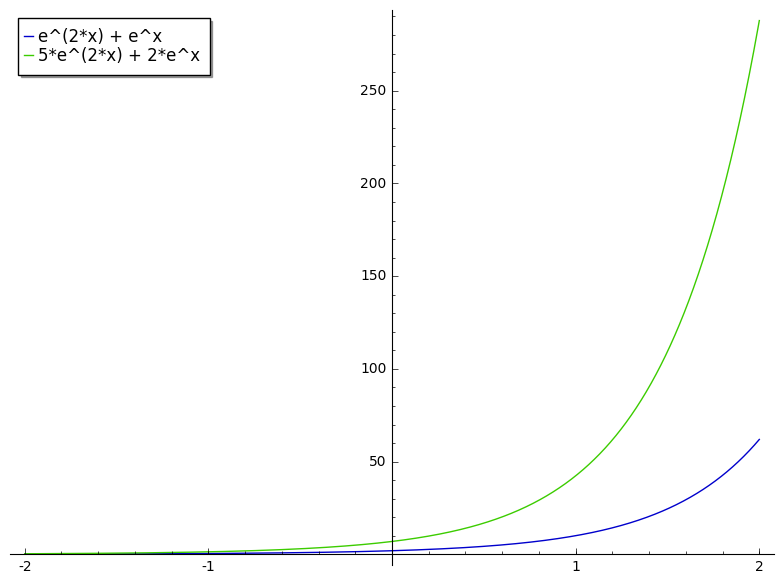

In [14]:
plot([yq(a=1,b=1),L(yq)(a=1,b=1)], (x, -2, 2), legend_label = 'automatic')

In [15]:
# R(x) = tan(x)
# guess
yq = a*tan(x)
print "Here's the function yq."
show(yq)
print "Here's yq operated upon by L."
show(L(yq))

Here's the function yq.


a*tan(x)

Here's yq operated upon by L.


2*(tan(x)^2 + 1)*a*tan(x) + a*tan(x)

Notice that in the last example, the function $R(x) = tan(x)$ has infinitely many linearly independent derivatives.

Consider a linear nonhomogenous DE with constant coeffecients, e.g., $$a_0y'' + a_1y' + a_2y = R(x).$$ 
- Suppose the forcing term $R(x)$ does has infinitely many linearly independent terms in derivatives of all orders.
- Then the DE does not yield to solution by the method of undetermined coeffecients. 
    - That is, we cannot advance a candidate solution $y_q$ generated by an *annihilator* $A(D)$, because there exists no polynomial in $D= \frac{d}{dx}$ that can annihilate infinitely many linearly independent terms. 
    - In this case, $A(D) y_q \neq 0$.

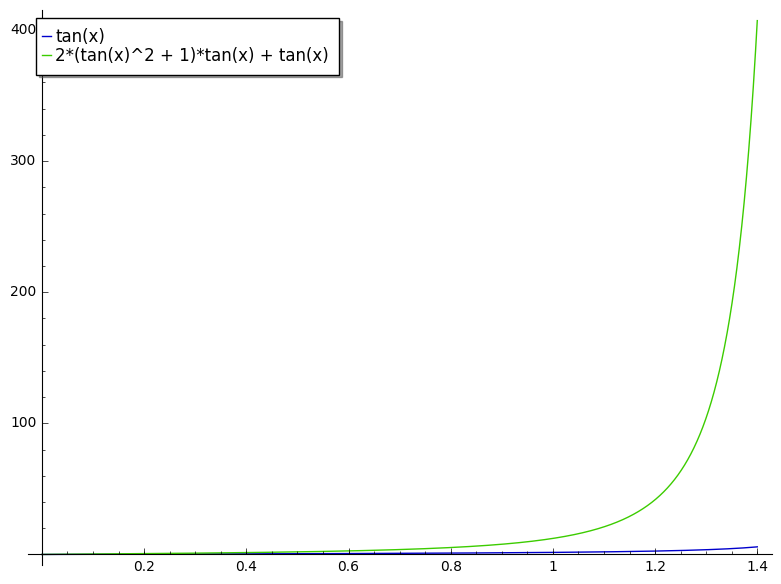

In [16]:
plot([yq(a=1),L(yq)(a=1)], (x, 0, 1.4), legend_label = 'automatic')

## Method of Undetermined Coefficients
###  &sect; 3.5 Prob 3: To find a particular solution.

We find a particular solution for the 2nd order nonhomogenous linear DE with constant coefficients, 
$$ y'' -y' -6y = 2\sin{3x}.$$

First we define the differential operator $L(y)$, which can be thought of as a polynomial in $D = \frac d{dx}$.

In [1]:
def L(y):
    return diff(y,x,2) - diff(y,x) - 6*y

We advance a candidate $y_q$ for a particular solution,
$$y_q = \vec k \cdot \pmatrix{\cos{3x} \\ \sin{3x}},$$ 
generated by the annihilator $$A(D) = D^2 + 3^2$$ where $$A(D)R(x) = A(D)[2\sin{3x}] = 0.$$

In [2]:
var('x')
k = vector([var('k%s'%i) for i in range(2)])
solsp = vector([cos(3*x), sin(3*x)])
yq = k*solsp
show(yq)

k0*cos(3*x) + k1*sin(3*x)

We'll require that $L(y_q) = R(x)$. That is, we'll determine $\vec k \in \mathbf{R}^2$ such that $$(D-3)(D-2)\left[\vec k \cdot \pmatrix{\cos{3x} \\ \sin{3x}}\right]= 2\sin{3x} \quad \text{for all }x \in \mathbf{R}.$$

We determine $\vec k$ by equating like terms (where sine and cosine are linearly independent functions) or by solving the linear system generated by evaluating $x$ at two distinct points. 

To take advantage of computation, we'll proceed with the later method. 
- First we print the hypothesized statement. 
- Then we evaluate the statement at two points $0$ and $1$, generating two linear equations in the variables $k_0$ and $k_1$. 
- Lastly, we solve the generated system by calling on the `solve` function.
    - SAGE converts the system to a matrix equation, then calls on its [software library](http://www.sagemath.org/links-components.html) for row reduction. 

In [3]:
print L(yq) == 2*sin(3*x)

-15*k0*cos(3*x) - 3*k1*cos(3*x) + 3*k0*sin(3*x) - 15*k1*sin(3*x) == 2*sin(3*x)


In [4]:
for x in [0,1]:
    print -15*k0*cos(3*x) - 3*k1*cos(3*x) + 3*k0*sin(3*x) - 15*k1*sin(3*x) == 2*sin(3*x)

-15*k0 - 3*k1 == 0
-15*k0*cos(3) - 3*k1*cos(3) + 3*k0*sin(3) - 15*k1*sin(3) == 2*sin(3)


In [5]:
solve([
    -15*k0 - 3*k1 == 0,
    -15*k0*cos(3) - 3*k1*cos(3) + 3*k0*sin(3) - 15*k1*sin(3) == 2*sin(3)], 
    k0, k1)

[[k0 == (1/39), k1 == (-5/39)]]

In [6]:
# The particular solution
show(yq(k0 = (1/39), k1 = (-5/39)))

1/39*cos(3*x) - 5/39*sin(3*x)

### &sect; 3.5 Prob 5: To find a general solution.

We find a particular solution for the DE 
$$y'' + y' + 1 = \sin^2 x.$$

The complementary solution is given
$$y_c = \vec c \cdot e^{-x/2}\pmatrix{\cos\sqrt{3/4}\ x\\ \sin\sqrt{3/4}\ x},$$
generated by the roots $-\frac12 \pm i\sqrt{\frac34}$ of the polynomial $P(D) = D^2 + D + 1$.

We advance the candidate $y_q$ for the particular solution 
$$y_q = \vec k \cdot \pmatrix{1 \\ \cos 2x \\ \sin 2x}$$ 
generated by the roots $0$, $\pm 2i$ of the annihilator 
$$A(D) = (D^2 + 2^2)D$$ 
where 
$$\begin{align}
    A(D) R(x) &=  (D^2 + 4)D [\sin^2{x}]\\
        & = (D^2 + 4) [2\sin{x}\cos{x}]\\ 
        & = (D^2 + 4) [\sin{2x}] &\text{(double angle of sine)}\\
        & = 0.
\end{align}$$

Note: we may obtain trigonometric identities readily from application of the [Euler identity](https://en.wikipedia.org/wiki/Euler%27s_formula) or specifically [De Moivre's formula](https://en.wikipedia.org/wiki/De_Moivre%27s_formula).

In [7]:
var('x')

def L(y):
    return diff(y, x, 2) + diff(y, x) + y

k = vector([var('k%s'%i) for i in range(3)])
yq = k*vector([1, cos(2*x), sin(2*x)])

show(L(yq) == sin(x)^2)

-3*k1*cos(2*x) + 2*k2*cos(2*x) - 2*k1*sin(2*x) - 3*k2*sin(2*x) + k0 == sin(x)^2

With the identity $$\sin^2{x} = \frac{1-\cos{2x}}2,$$ 
determining $\vec k$ is an excercise in linear algebra.

Equating like terms (which we may do because $\{1, \cos{x}, \sin{x}\}$ is a set of linearly independent functions), we obtain the linear system 
$$
\pmatrix{
    1 &  0 &  0 \\
    0 & -3 &  2 \\
    0 & -2 & -3}
\vec k = 
\pmatrix{1/2 \\ -1/2 \\ 0}
$$

with solution $\vec k  = \pmatrix{1/2 \\ 3/26 \\ -1/13}$.


In [8]:
# checking work
A = matrix(QQ, 3, 3, [1, 0, 0,
                     0, -3, 2,
                     0, -2, -3])
b = vector(QQ, [1/2, -1/2, 0])
A\b

(1/2, 3/26, -1/13)

In [9]:
# The particular solution
show(yq(k0=1/2,  k1 = 3/26, k2 = -1/13))

3/26*cos(2*x) - 1/13*sin(2*x) + 1/2

We have a general solution 
$$y = y_c + y_p = 
    \vec c \cdot 
        e^{-x/2}\pmatrix{
            \cos\sqrt{3/4}\ x\\ 
            \sin\sqrt{3/4}\ x} 
    + \pmatrix{1/2\\ 3/26\\ -1/13}\cdot\pmatrix{1 \\ \cos 2x \\ \sin 2x}.$$

### Lecture 27. To fit a general solution to initial conditions.

We solve the IVP
$$ y'' - 3y' + 2y = xe^{2x}+\sin{x},\quad \pmatrix{y(0) \\ y'(0)} = \pmatrix{1.3 \\ 4.1}.$$

Noticing that $P(D) = D^2 - 3D + 2 = (D-2)(D-1)$, and $A(D) = (D^2+1)(D-2)^2$, we'll advance the candidate for the particular solution $$y_q = \vec \kappa \cdot \pmatrix{x e^{2x} \\ x^2 e^{2x}\\ \cos(x)\\ \sin(x)}.$$

In [17]:
var('x')
k1, k2, k3, k4 = var('k1 k2 k3 k4')
k = vector([k1,k2,k3,k4])
sols = vector((x*exp(2*x), x^2*exp(2*x), cos(x), sin(x)))
yq = k*sols
show(yq)

k2*x^2*e^(2*x) + k1*x*e^(2*x) + k3*cos(x) + k4*sin(x)

In [18]:
def L(y):
    return diff(y, x, 2) - 3*diff(y, x) + 2*y

print 'L(yq) is given'
show(L(yq))

L(yq) is given


2*k2*x*e^(2*x) + k3*cos(x) - 3*k4*cos(x) + k1*e^(2*x) + 2*k2*e^(2*x) + 3*k3*sin(x) + k4*sin(x)

We require that $y_q$ satisfies $L(y_q) = R(x) = xe^{2x}+\sin{x}$, whence we equate linearly independent terms to obtain the system of equations $$\pmatrix{
1 & 2 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 1 & -3 \\
0 & 0 & 3 & 1}
\vec\kappa = \pmatrix{0\\ 1\\ 0\\ 1}.$$

In [19]:
A = matrix(QQ, 4,4, [1,2,0,0,
                     0,2,0,0,
                     0,0,1,-3,
                     0,0,3,1])
Rx_coeffs = vector(QQ, [0,1,0,1])

Solving the system, we obtain the particular solution.

In [20]:
yp = (A\Rx_coeffs)*sols
show(yp)

1/2*x^2*e^(2*x) - x*e^(2*x) + 3/10*cos(x) + 1/10*sin(x)

Recall the complemetary solution---it spans a two dimensional vector space.

In [21]:
c1, c2 = var('c1 c2')
c = vector((c1,c2))
yc = c*vector((exp(x), exp(2*x)))
show(yc)

c2*e^(2*x) + c1*e^x

Here's the general solution. Let's fix the parameters $c_1$ and $c_2$ in accordance with our ICs.

In [22]:
y = yc + yp
show(y)

1/2*x^2*e^(2*x) + c2*e^(2*x) - x*e^(2*x) + c1*e^x + 3/10*cos(x) + 1/10*sin(x)

In [23]:
show(y(x=0) == 13/10)
show(diff(y,x)(x=0) == 41/10)

c1 + c2 + 3/10 == (13/10)

c1 + 2*c2 - 9/10 == (41/10)

In [24]:
solve([y(x=0) == 13/10, diff(y,x)(x=0) == 41/10], c1, c2)

[[c1 == -3, c2 == 4]]

1/2*x^2*e^(2*x) - x*e^(2*x) + 3/10*cos(x) + 4*e^(2*x) - 3*e^x + 1/10*sin(x)

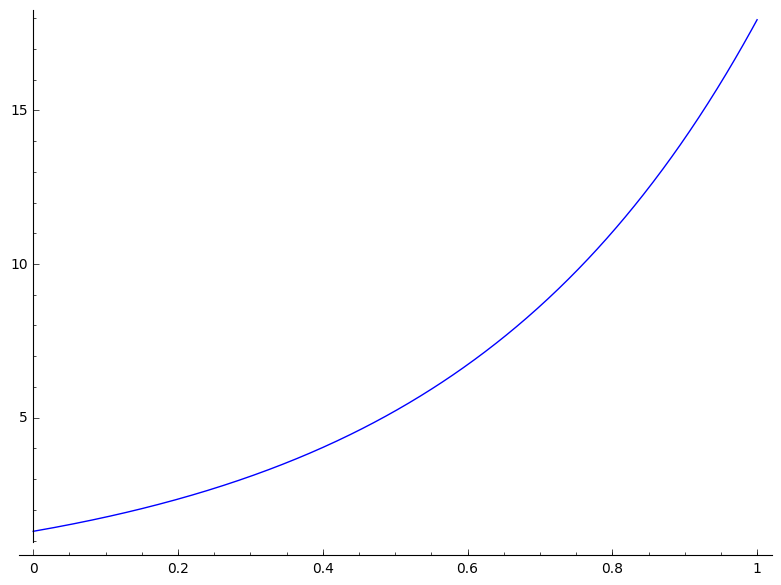

In [25]:
#The solution to the IVP
show(y(c1 = -3, c2 = 4))
plot(y(c1 = -3, c2 = 4), (x, 0,1))

### To fit a general solution to initial conditions (part II).

Solve the IVP $y'' -3y' +2y = 3e^{-x}-10\cos{3x}$, given the ICs $\pmatrix{y(0)\\y'(0)} = \pmatrix{1\\2}$.

We'll advance $$y_q = \vec{k}\cdot\pmatrix{e^{-x}\\\cos{3x}\\\sin{3x}}$$ as a candidate for the particular solution. 

With $P(D) = D^2 - 3D +2$ and $R(x) = 3e^{-x}-10\cos{3x}$, we require that $$P(D) y_q = R(x).$$ 

That is,

In [26]:
var('x')
k1, k2, k3 = var('k1 k2 k3')
k = vector([k1, k2, k3])
solsp = vector([e^(-x), cos(3*x), sin(3*x)])
yq = k*solsp

def L(f):
    return diff(f,x,2) -3*diff(f,x) +2*f

show(L(yq) == 3*e^(-x)-10*cos(3*x))

-7*k2*cos(3*x) - 9*k3*cos(3*x) + 6*k1*e^(-x) + 9*k2*sin(3*x) - 7*k3*sin(3*x) == -10*cos(3*x) + 3*e^(-x)

We obtain a linear system for $\vec{k}$ and solve it.

In [27]:
A = matrix(QQ, [[6, 0, 0],
                [0, -7, -9],
                [0, 9, -7]])
b = vector(QQ, [3, -10, 0])
k = A\b
k

(1/2, 7/13, 9/13)

Thus $\vec k = \pmatrix{1/2\\ 7/13\\ 9/13}$. We now have a general solution 
$$y = y_c + y_p = \vec{c}\cdot\pmatrix{e^x\\e^{2x}} + \pmatrix{1/2\\ 7/13\\ 9/13}\cdot\pmatrix{e^{-x}\\\cos{3x}\\\sin{3x}}.$$

In [28]:
k = vector([1/2, 7/13, 9/13])

c1, c2 = var('c1 c2')
c = vector([c1,c2])
y = c*vector([e^x, e^(2*x)]) + k*vector([e^(-x),cos(3*x),sin(3*x)])
show(y)

c2*e^(2*x) + c1*e^x + 7/13*cos(3*x) + 1/2*e^(-x) + 9/13*sin(3*x)

To find $\vec c$, we'll differentiate and apply the initial conditions to form a system of linear equations.

In [29]:
print y(x=0) == 1
print diff(y,x)(x=0) == 2

c1 + c2 + 27/26 == 1
c1 + 2*c2 + 41/26 == 2


In [30]:
solve(
    [c1 + c2 + 27/26 == 1, 
    c1 + 2*c2 + 41/26 == 2], 
    c1, c2
)

[[c1 == (-1/2), c2 == (6/13)]]

In [31]:
#Whence
c = vector([-1/2,6/13])

#and the solution to the IVP is given
y = c*vector([e^x, e^(2*x)]) + k*vector([e^(-x),cos(3*x),sin(3*x)])
show(y)

7/13*cos(3*x) + 6/13*e^(2*x) + 1/2*e^(-x) - 1/2*e^x + 9/13*sin(3*x)

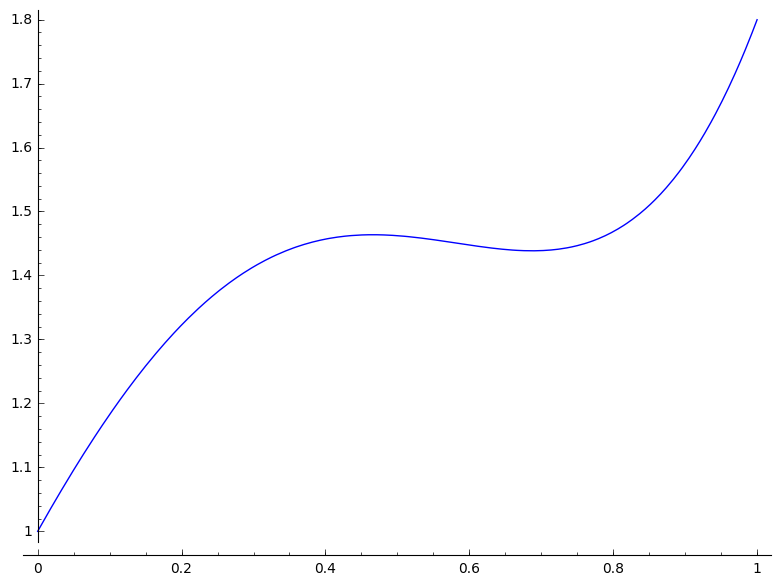

In [32]:
plot(y, (x, 0, 1))

### &sect; 3.5 Example 7. To determine coefficients numerically.

We find the general solution to the 3rd order linear nonhomogenous DE with constant coefficients
$$ y^{(3)} + 9y' = x\sin x + x^2 e^{2x}.$$

In this example, the differential operators, $P(D)$ and $A(D)$, (which eliminate the LHS and RHS of the DE resp.) have distinct roots.

So each term in the naïve candidate for the particular solution $y_q$ is linearly independent from terms in complementary solution $y_c$.

I initialize the (symbolic) vector of coefficients $\vec k$ of with undetermined entries and write $y_q$ as a dot product.

In [33]:
var('x')
k = vector([var('k%s'%i) for i in range(7)])
sp = vector([cos(x),
           sin(x),
           x*cos(x),
           x*sin(x),
           e^(2*x),
           x*e^(2*x),
           x^2*e^(2*x)])
yq = k*sp
show(yq)

k6*x^2*e^(2*x) + k2*x*cos(x) + k5*x*e^(2*x) + k3*x*sin(x) + k0*cos(x) + k4*e^(2*x) + k1*sin(x)

Now we require that $L(y_q) = R(x)$.

In [34]:
def L(y):
    return diff(y,x,3) + 9*diff(y,x)

show(L(yq) == x^2*e^(2*x)+ x*sin(x))

26*k6*x^2*e^(2*x) + 8*k3*x*cos(x) + 26*k5*x*e^(2*x) + 42*k6*x*e^(2*x) - 8*k2*x*sin(x) + 8*k1*cos(x) + 6*k2*cos(x) + 26*k4*e^(2*x) + 21*k5*e^(2*x) + 12*k6*e^(2*x) - 8*k0*sin(x) + 6*k3*sin(x) == x^2*e^(2*x) + x*sin(x)

The statement above is true at all values of $x$, so we take a educated guess and evaluate $x$ at each integer $0,\ldots, 6$ to produce $7$ equations to for the $7$ undetermined coefficients. 

In [35]:
for i in range(7):
    x = i
    print str(26*k6*x^2*e^(2*x) + 8*k3*x*cos(x) + 26*k5*x*e^(2*x) + 42*k6*x*e^(2*x) - 8*k2*x*sin(x) + 8*k1*cos(x) + 6*k2*cos(x) + 26*k4*e^(2*x) + 21*k5*e^(2*x) + 12*k6*e^(2*x) - 8*k0*sin(x) + 6*k3*sin(x) == x^2*e^(2*x) + x*sin(x)) +','

8*k1 + 6*k2 + 26*k4 + 21*k5 + 12*k6 == 0,
8*k1*cos(1) + 6*k2*cos(1) + 8*k3*cos(1) + 26*k4*e^2 + 47*k5*e^2 + 80*k6*e^2 - 8*k0*sin(1) - 8*k2*sin(1) + 6*k3*sin(1) == e^2 + sin(1),
8*k1*cos(2) + 6*k2*cos(2) + 16*k3*cos(2) + 26*k4*e^4 + 73*k5*e^4 + 200*k6*e^4 - 8*k0*sin(2) - 16*k2*sin(2) + 6*k3*sin(2) == 4*e^4 + 2*sin(2),
8*k1*cos(3) + 6*k2*cos(3) + 24*k3*cos(3) + 26*k4*e^6 + 99*k5*e^6 + 372*k6*e^6 - 8*k0*sin(3) - 24*k2*sin(3) + 6*k3*sin(3) == 9*e^6 + 3*sin(3),
8*k1*cos(4) + 6*k2*cos(4) + 32*k3*cos(4) + 26*k4*e^8 + 125*k5*e^8 + 596*k6*e^8 - 8*k0*sin(4) - 32*k2*sin(4) + 6*k3*sin(4) == 16*e^8 + 4*sin(4),
8*k1*cos(5) + 6*k2*cos(5) + 40*k3*cos(5) + 26*k4*e^10 + 151*k5*e^10 + 872*k6*e^10 - 8*k0*sin(5) - 40*k2*sin(5) + 6*k3*sin(5) == 25*e^10 + 5*sin(5),
8*k1*cos(6) + 6*k2*cos(6) + 48*k3*cos(6) + 26*k4*e^12 + 177*k5*e^12 + 1200*k6*e^12 - 8*k0*sin(6) - 48*k2*sin(6) + 6*k3*sin(6) == 36*e^12 + 6*sin(6),


The solution is straight forward---it's a consistent linear system.

In [36]:
solve(
    [8*k1 + 6*k2 + 26*k4 + 21*k5 + 12*k6 == 0,
    8*k1*cos(1) + 6*k2*cos(1) + 8*k3*cos(1) + 26*k4*e^2 + 47*k5*e^2 + 80*k6*e^2 - 8*k0*sin(1) - 8*k2*sin(1) + 6*k3*sin(1) == e^2 + sin(1),
    8*k1*cos(2) + 6*k2*cos(2) + 16*k3*cos(2) + 26*k4*e^4 + 73*k5*e^4 + 200*k6*e^4 - 8*k0*sin(2) - 16*k2*sin(2) + 6*k3*sin(2) == 4*e^4 + 2*sin(2),
    8*k1*cos(3) + 6*k2*cos(3) + 24*k3*cos(3) + 26*k4*e^6 + 99*k5*e^6 + 372*k6*e^6 - 8*k0*sin(3) - 24*k2*sin(3) + 6*k3*sin(3) == 9*e^6 + 3*sin(3),
    8*k1*cos(4) + 6*k2*cos(4) + 32*k3*cos(4) + 26*k4*e^8 + 125*k5*e^8 + 596*k6*e^8 - 8*k0*sin(4) - 32*k2*sin(4) + 6*k3*sin(4) == 16*e^8 + 4*sin(4),
    8*k1*cos(5) + 6*k2*cos(5) + 40*k3*cos(5) + 26*k4*e^10 + 151*k5*e^10 + 872*k6*e^10 - 8*k0*sin(5) - 40*k2*sin(5) + 6*k3*sin(5) == 25*e^10 + 5*sin(5),
    8*k1*cos(6) + 6*k2*cos(6) + 48*k3*cos(6) + 26*k4*e^12 + 177*k5*e^12 + 1200*k6*e^12 - 8*k0*sin(6) - 48*k2*sin(6) + 6*k3*sin(6) == 36*e^12 + 6*sin(6)], 
      k)

[[k0 == 0, k1 == (3/32), k2 == (-1/8), k3 == 0, k4 == (285/8788), k5 == (-21/338), k6 == (1/26)]]

The particular solution is

In [37]:
yp = yq(k0 = 0, k1 = (3/32), k2 = (-1/8), k3 = 0, k4 = (285/8788), k5 = (-21/338), k6 = (1/26))
show(yp)

1/26*x^2*e^(2*x) - 1/8*x*cos(x) - 21/338*x*e^(2*x) + 285/8788*e^(2*x) + 3/32*sin(x)

The general solution $y$ simply the sum of the particular $y_p$ and the complementary $y_q$ solutions. In this case, if $V$ represents the solution space, we have $\dim(V) = 3$.

In [38]:
var('x')
c1, c2, c3 = var('c1 c2 c3')
yc = vector([c1,c2,c3])*vector([1,cos(3*x),sin(3*x)])
y = yc + yp
show(y)

1/26*x^2*e^(2*x) + c2*cos(3*x) - 1/8*x*cos(x) - 21/338*x*e^(2*x) + c3*sin(3*x) + c1 + 285/8788*e^(2*x) + 3/32*sin(x)

To get an idea that the solution space *really is* spanned by three linearly independent functions, I'll vary each of the three respective parameters.

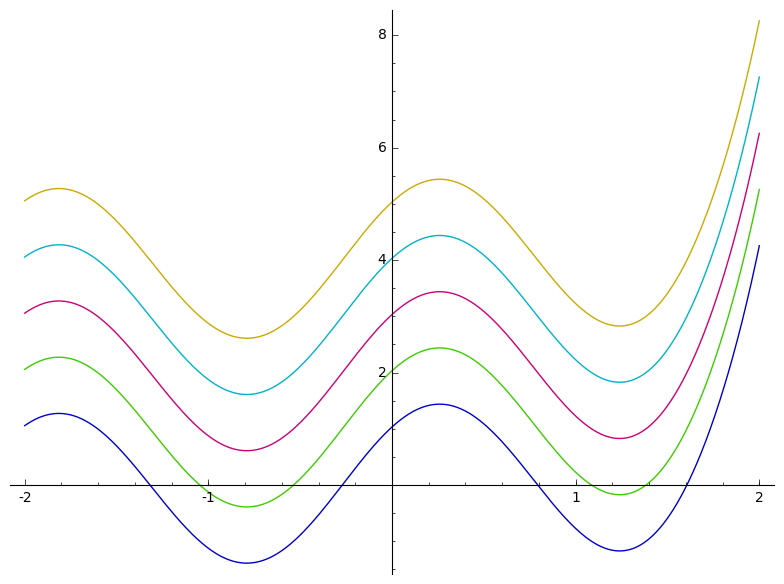

In [39]:
# vary the constant term
plot([y(c1 = i, c2 = 1, c3 = 1) for i in range(5)], (x, -2, 2))

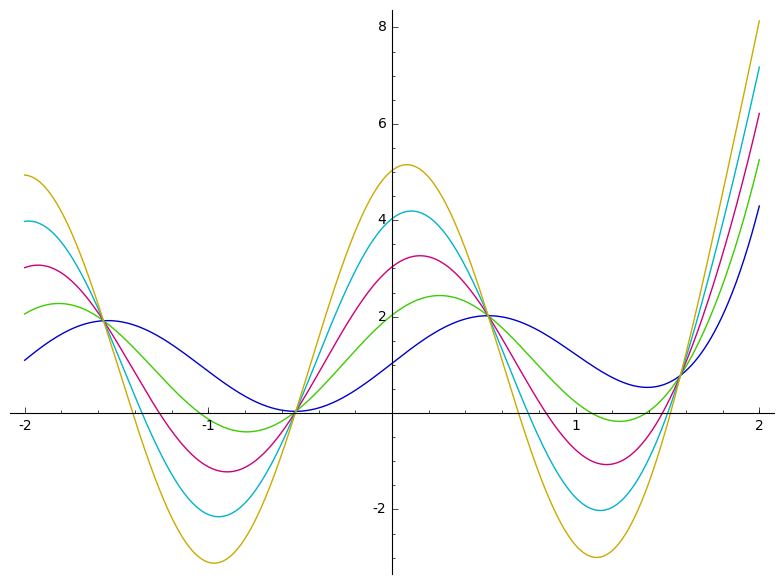

In [40]:
# vary cosine
plot([y(c1 = 1, c2 = i, c3 = 1) for i in range(5)], (x, -2, 2))

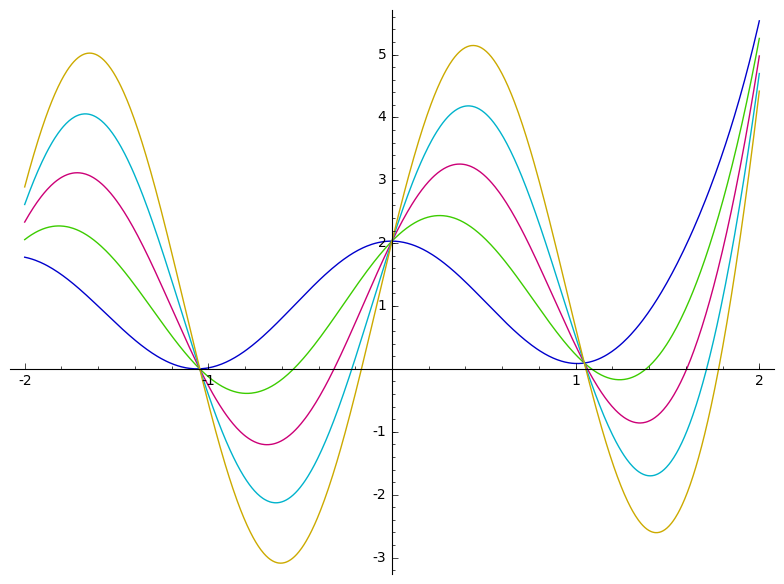

In [41]:
#vary sine
plot([y(c1 = 1, c2 = 1, c3 = i) for i in range(5)], (x, -2, 2))

## Beat Oscillations

In [55]:
# tiny natural frequency, large forcing frequency
x, t = var('x t')
x = function('x')(t)
h = desolve(diff(x,t,2) + 9*x == sin(t/10), x, ics = [0,0,0])
h

-10/2697*sin(3*t) + 100/899*sin(1/10*t)

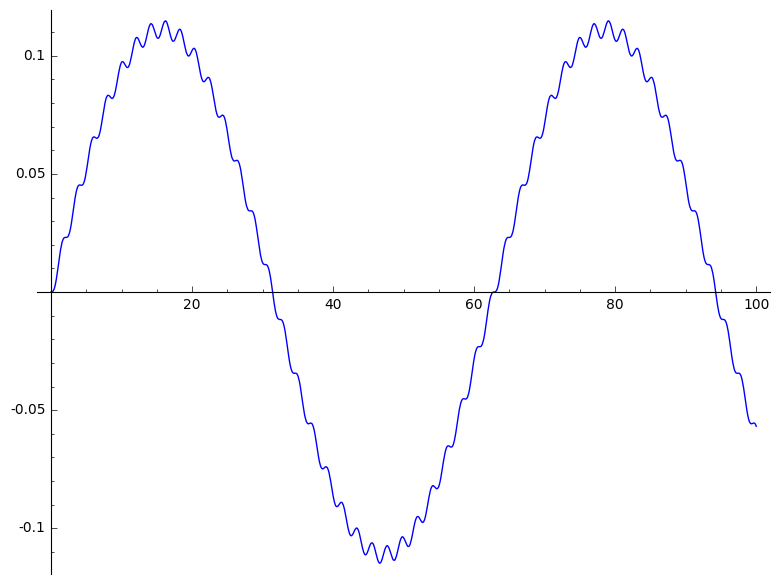

In [43]:
plot(h, (t, 0, 100), plot_points = 1000)

### Various initial conditions.
I start with a solution to an undamped forced oscillation, and graph the solution while varying either the *initial position* or the *initial velocity* of the system (and holding the other fixed).

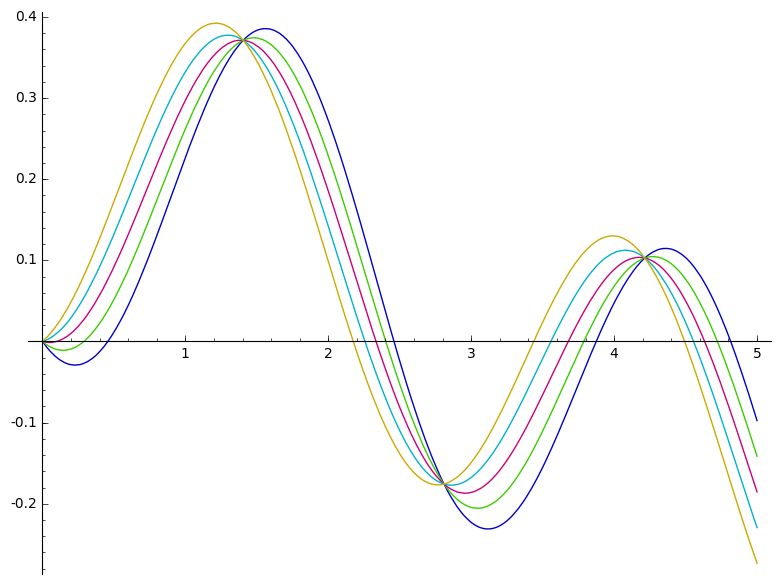

In [44]:
#vary initial velocity
sols = [desolve(diff(x,t,2) + 5*x == cos(t/2), x, ics = [0,0,(i-2.5)/10]) for i in range(5)]
plot(sols, (t, 0, 5))

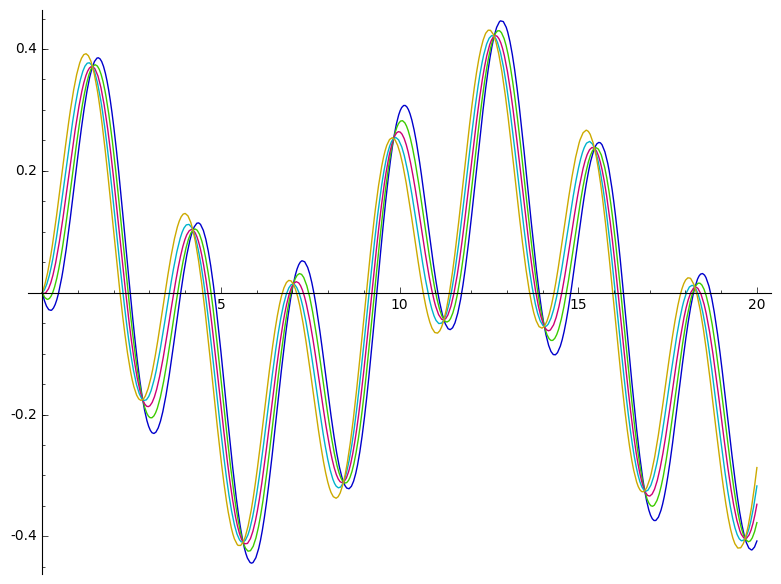

In [45]:
# larger timescale
sols = [desolve(diff(x,t,2) + 5*x == cos(t/2), x, ics = [0,0,(i-2.5)/10]) for i in range(5)]
plot(sols, (t, 0, 20))

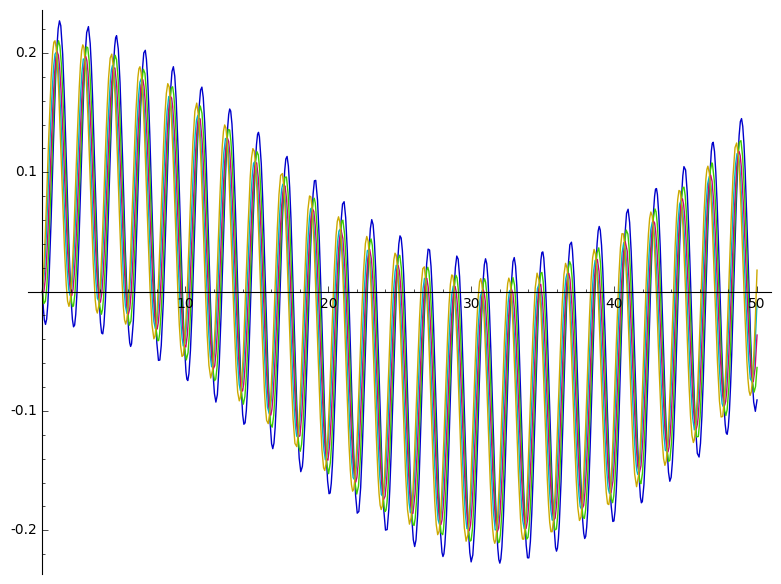

In [46]:
# tighten spring and slower forcing
sols = [desolve(diff(x,t,2) + 10*x == cos(t/10), x, ics = [0,0,(i-2.5)/10]) for i in range(5)]
plot(sols, (t, 0, 50))

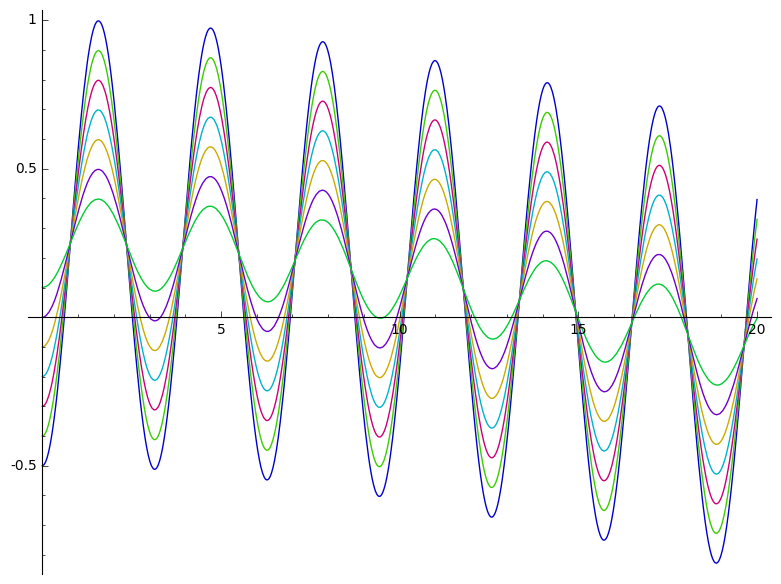

In [47]:
# vary initial position
sols = [desolve(diff(x,t,2) + 4*x == cos(t/10), x, ics = [0,(i-5)/10,0]) for i in range(7)]
plot(sols, (t, 0, 20))

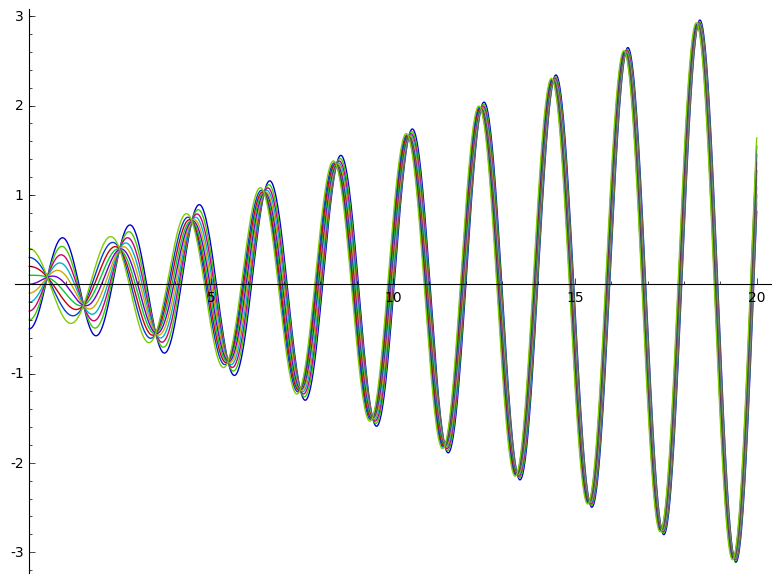

In [48]:
# vary initial position given resonance
sols = [desolve(diff(x,t,2) + 10*x == cos(sqrt(10)*t), x, ics = [0,(i-5)/10,0]) for i in range(10)]
plot(sols, (t, 0, 20))

### Beat Harmonics
In these graphs, I vary either the system's natural frequency or the frequency of the forcing fucntion.

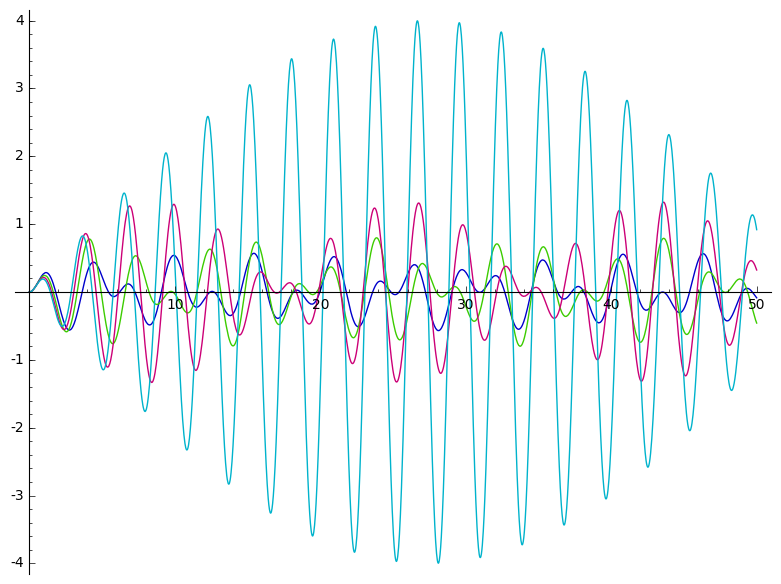

In [49]:
# vary forcing frequency towards natural frequency
sols = [desolve(diff(x,t,2) + 5*x == cos(sqrt(0.5+i)*t), x, ics = [0,0,0]) for i in [1..4]]
plot(sols, (t, 0, 50))

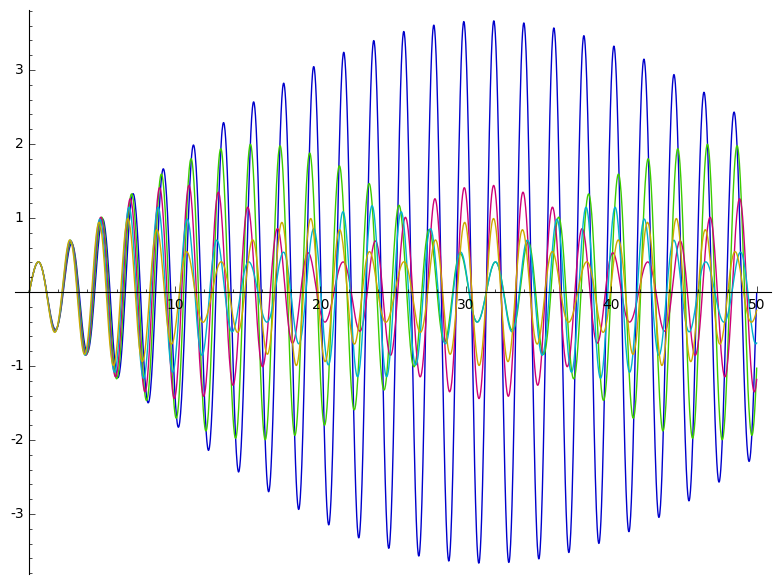

In [50]:
# again, vary forcing frequency towards natural frequency
sols = [desolve(diff(x,t,2) + 9*x == sin((3.1+(i/10))*t), x, ics = [0,0,1]) for i in range(5)]
plot(sols, (t, 0, 50))

It's worth noticing that for small values of $x$, we have, by Taylor's theorem, $\sin(x) \approx x$. In the above graph, the envelope of the beat vibration is a sine wave. As we push the forcing frequency towards the natural frequency, *beat envelope approximates a linear function$ for small time values. 

In other words, in the system $$m\ddot x + kx = F_0\cos(\omega t),$$ as $\omega \to \sqrt{k/m}$, the period of the beat envelope blows up.

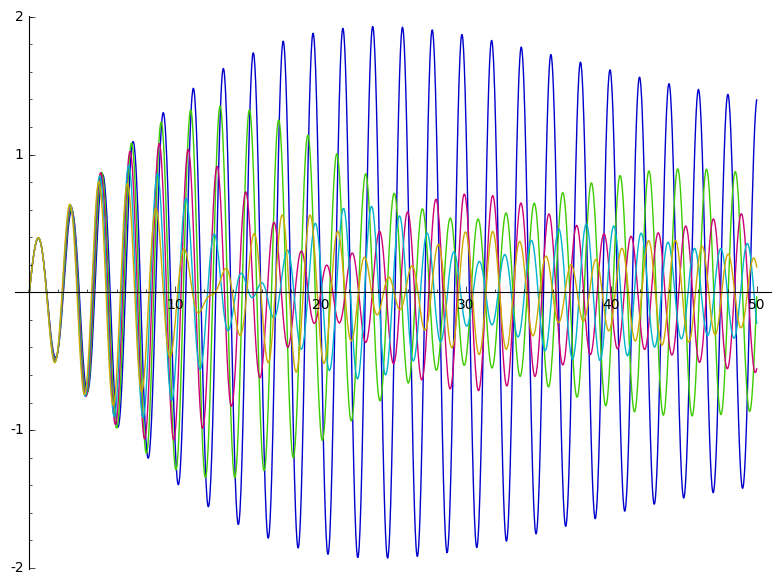

In [51]:
# add damping
sols = [desolve(diff(x,t,2) + 0.1*diff(x,t) + 9*x == sin((3.1+(i/10))*t), x, ics = [0,0,1]) for i in range(5)]
plot(sols, (t, 0, 50))

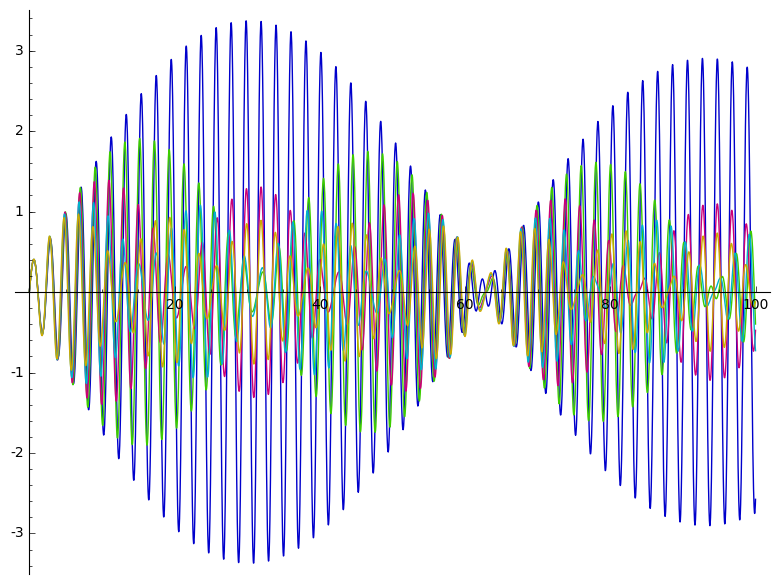

In [52]:
# larger time scale
sols = [desolve(diff(x,t,2) + 0.01*diff(x,t) + 9*x == sin((3.1+(i/10))*t), x, ics = [0,0,1]) for i in range(5)]
plot(sols, (t, 0, 100))

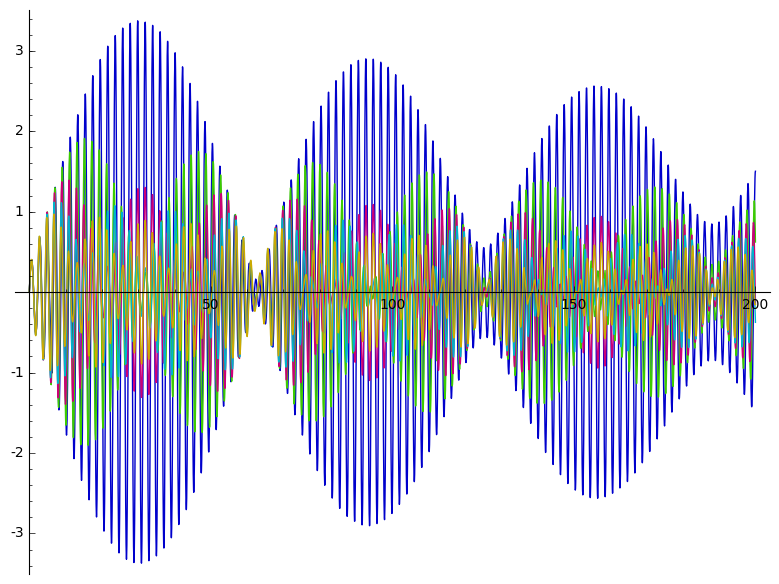

In [53]:
# even larger timescale
sols = [desolve(diff(x,t,2) + 0.01*diff(x,t) + 9*x == sin((3.1+(i/10))*t), x, ics = [0,0,1]) for i in range(5)]
plot(sols, (t, 0, 200))

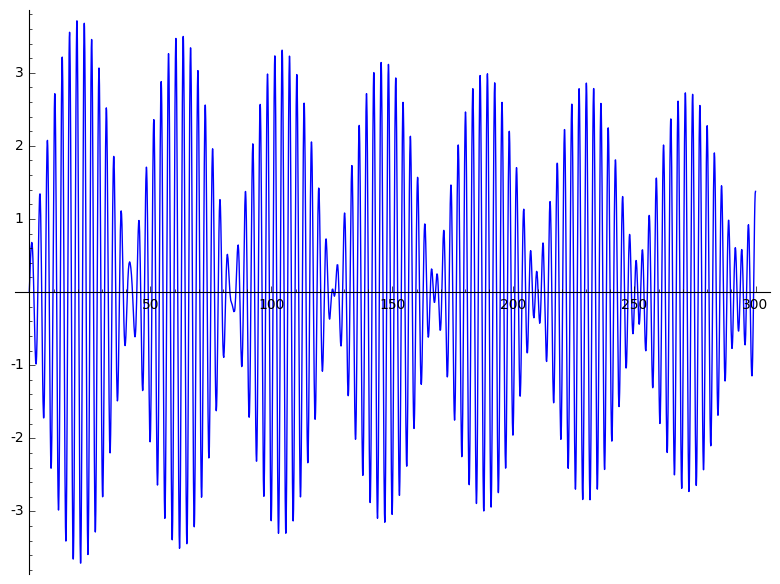

In [54]:
# damping over 7 beats
sol = desolve(diff(x,t,2) + 0.005*diff(x,t) + 4*x == sin(2.15*t), x, ics = [0,0,1])
plot(sol, (t, 0, 300))

See also [coupled pendula](https://www.youtube.com/watch?v=CguKKl9mX2s).